# **Práctica 8: Fusion de datos**

Nombre: Angel Damian Monroy Mendoza
 
No. Cuenta: 316040707

Email: adamianmm@gmail.com

### **Contexto**

* La retinopatía diabética aparece como consecuencia del daño en los vasos sanguíneos de la retina (parte posterior del ojo). 
* El azúcar en la sangre, no controlado correctamente, es un factor de riesgo. Entre los síntomas comunes destacan: visión borrosa, visión oscura, dificultad para percibir los colores, y ceguera.

**Objetivo:** Hacer una fusión de datos a través de la media, mediana y un aproximador lineal.

**Fuente de datos**

Datos recolectados en los últimos años.

### **Importar las bibliotecas**

In [1]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, max_error, r2_score 
%matplotlib inline

### **I. Acceso a datos**

In [2]:
Retinopatia = pd.read_csv('Datos/DiabeticRetinopathy.csv')
Retinopatia

,patient,patient.number,obs,health.status,group,f_000001,f_000002,f_000003,f_000004,f_000005,...,f_000061,f_000062,f_000063,f_000064,f_000065,f_000066,f_000067,f_000068,f_000069,f_000070
0,paciente151_1,151,1,health,none,2150.745881,1812.296506,1797.425232,2000.402651,2096.775161,...,3.332748,3.480402,3.854307,5.245511,9.215420,15.686887,20.877630,21.301055,17.878146,13.799770
1,paciente411hpf0.3hzmedian_6,411,6,health,none,201.462060,227.196312,239.527682,242.712595,233.877109,...,15.576554,16.825167,18.315843,20.076293,21.848763,23.448133,24.781314,25.852985,26.772444,27.510021
2,paciente237hpf0.3hzmedian_4,237,4,disorder,none,57.266926,42.895909,37.259729,34.940005,31.036661,...,34.657351,34.727477,35.977187,38.361017,41.693322,45.194320,47.899705,49.562395,50.450740,50.533996
3,paciente116hpf0.3hzmedian_7,116,7,health,none,229.556540,218.015928,229.962008,214.427812,169.474568,...,18.014346,20.047497,22.536181,25.359234,28.353100,31.507935,34.888351,38.140906,40.915108,43.514155
4,paciente131_2,131,2,health,none,94.251665,96.188890,101.315349,102.756134,99.327028,...,7.042471,7.696502,8.379038,8.982337,9.471419,9.876325,10.282313,10.735607,11.146974,11.359566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,paciente396hpf0.3hzmedian_5,396,5,health,none,26.918454,30.309754,32.370351,33.266800,34.510788,...,3.341653,3.410566,3.541230,3.752837,3.991767,4.186375,4.322308,4.465974,4.699261,5.044514
1108,paciente412hpf0.3hzmedian_3,412,3,health,none,444.511027,430.493455,419.294383,427.814583,464.004222,...,14.687543,16.202893,17.692761,19.226280,21.524516,24.649297,26.917099,26.890498,25.170626,23.127421
1109,paciente398hpf0.3hzmedian_7,398,7,health,none,253.650671,337.009270,426.335102,487.426947,525.123416,...,2.039017,2.153674,2.299899,2.457559,2.662999,2.969399,3.374929,3.818873,4.224368,4.547494
1110,paciente370hpf0.3hzmedian_6,370,6,health,none,1322.642976,1282.723175,1302.099324,1320.569524,1337.036977,...,23.274529,24.340751,25.133467,25.785277,26.281525,26.752091,27.452770,28.444717,29.522745,30.401168


In [3]:
Retinopatia.drop(['patient', 'patient.number', 'obs', 'group'], axis=1, inplace=True)
Retinopatia

,health.status,f_000001,f_000002,f_000003,f_000004,f_000005,f_000006,f_000007,f_000008,f_000009,...,f_000061,f_000062,f_000063,f_000064,f_000065,f_000066,f_000067,f_000068,f_000069,f_000070
0,health,2150.745881,1812.296506,1797.425232,2000.402651,2096.775161,1901.665846,1542.094413,1235.418132,1055.299286,...,3.332748,3.480402,3.854307,5.245511,9.215420,15.686887,20.877630,21.301055,17.878146,13.799770
1,health,201.462060,227.196312,239.527682,242.712595,233.877109,210.513469,191.437958,202.668934,242.237323,...,15.576554,16.825167,18.315843,20.076293,21.848763,23.448133,24.781314,25.852985,26.772444,27.510021
2,disorder,57.266926,42.895909,37.259729,34.940005,31.036661,25.152557,19.968624,16.827274,14.809649,...,34.657351,34.727477,35.977187,38.361017,41.693322,45.194320,47.899705,49.562395,50.450740,50.533996
3,health,229.556540,218.015928,229.962008,214.427812,169.474568,117.856876,78.850049,60.246079,60.042319,...,18.014346,20.047497,22.536181,25.359234,28.353100,31.507935,34.888351,38.140906,40.915108,43.514155
4,health,94.251665,96.188890,101.315349,102.756134,99.327028,94.523127,90.872227,87.441905,81.699262,...,7.042471,7.696502,8.379038,8.982337,9.471419,9.876325,10.282313,10.735607,11.146974,11.359566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,health,26.918454,30.309754,32.370351,33.266800,34.510788,36.818745,40.040679,44.653186,50.669628,...,3.341653,3.410566,3.541230,3.752837,3.991767,4.186375,4.322308,4.465974,4.699261,5.044514
1108,health,444.511027,430.493455,419.294383,427.814583,464.004222,503.705996,500.025801,444.127540,382.045806,...,14.687543,16.202893,17.692761,19.226280,21.524516,24.649297,26.917099,26.890498,25.170626,23.127421
1109,health,253.650671,337.009270,426.335102,487.426947,525.123416,560.300413,597.905585,627.652998,635.203600,...,2.039017,2.153674,2.299899,2.457559,2.662999,2.969399,3.374929,3.818873,4.224368,4.547494
1110,health,1322.642976,1282.723175,1302.099324,1320.569524,1337.036977,1379.770024,1396.685578,1325.441130,1181.954549,...,23.274529,24.340751,25.133467,25.785277,26.281525,26.752091,27.452770,28.444717,29.522745,30.401168


In [4]:
print(Retinopatia.groupby('health.status').size())

health.status
disorder    556
health      556
dtype: int64


### **II. Análisis Exploratorio de Datos**

#### **1) Estructura de los Datos**

In [5]:
Retinopatia.shape

(1112, 71)

In [6]:
Retinopatia.dtypes

health.status     object
f_000001         float64
f_000002         float64
f_000003         float64
f_000004         float64
                  ...   
f_000066         float64
f_000067         float64
f_000068         float64
f_000069         float64
f_000070         float64
Length: 71, dtype: object

#### **2) Identificación de Datos Faltantes**

In [7]:
Retinopatia.isnull().sum()

health.status    0
f_000001         0
f_000002         0
f_000003         0
f_000004         0
                ..
f_000066         0
f_000067         0
f_000068         0
f_000069         0
f_000070         0
Length: 71, dtype: int64

In [8]:
Retinopatia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1112 entries, 0 to 1111
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   health.status  1112 non-null   object 
 1   f_000001       1112 non-null   float64
 2   f_000002       1112 non-null   float64
 3   f_000003       1112 non-null   float64
 4   f_000004       1112 non-null   float64
 5   f_000005       1112 non-null   float64
 6   f_000006       1112 non-null   float64
 7   f_000007       1112 non-null   float64
 8   f_000008       1112 non-null   float64
 9   f_000009       1112 non-null   float64
 10  f_000010       1112 non-null   float64
 11  f_000011       1112 non-null   float64
 12  f_000012       1112 non-null   float64
 13  f_000013       1112 non-null   float64
 14  f_000014       1112 non-null   float64
 15  f_000015       1112 non-null   float64
 16  f_000016       1112 non-null   float64
 17  f_000017       1112 non-null   float64
 18  f_000018

#### **3) Detección de Valores Atípicos**

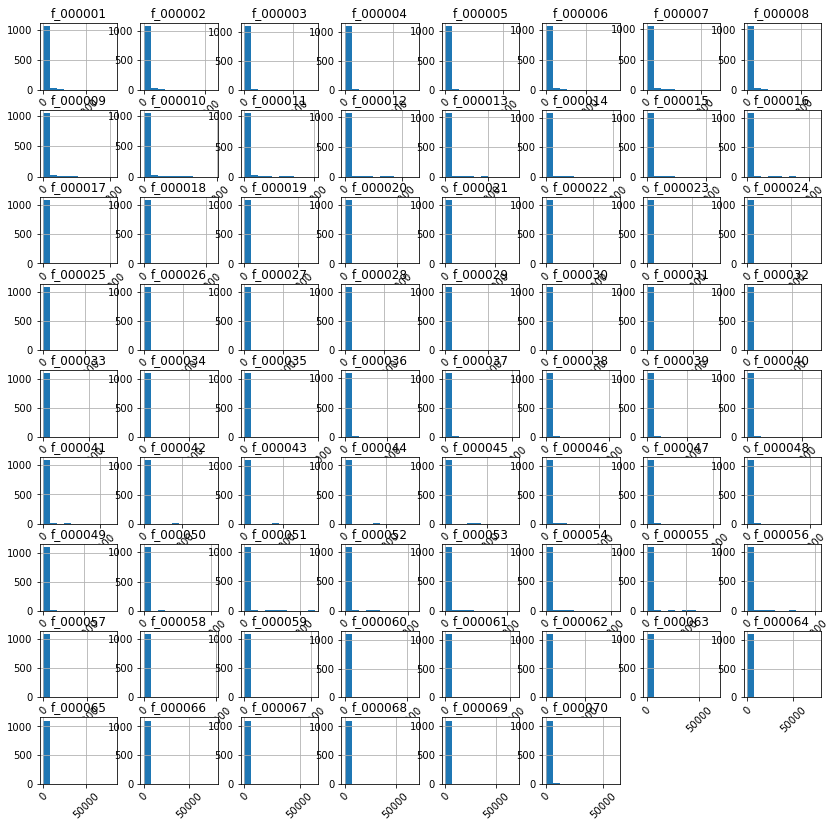

In [9]:
Retinopatia.hist(figsize=(14,14), xrot=45)
plt.show()

C:\Users\Principal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


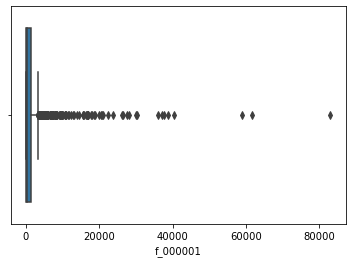

C:\Users\Principal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


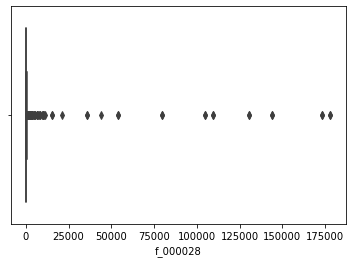

C:\Users\Principal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


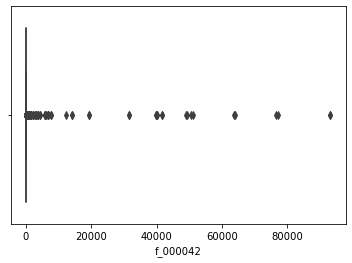

C:\Users\Principal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


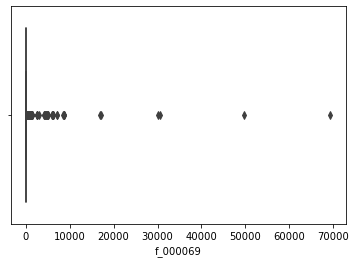

In [10]:
VariablesValoresAtipicos = ['f_000001', 'f_000028', 'f_000042', 'f_000069']
for col in VariablesValoresAtipicos:
  sns.boxplot(col, data=Retinopatia)
  plt.show()

Como fueron datos recolectados de los últimos años, se tomarán como que los datos atípicos son fidedignos.

#### **4) Identificación de Relaciones Entre Pares Variables**

In [11]:
Retinopatia.corr()

,f_000001,f_000002,f_000003,f_000004,f_000005,f_000006,f_000007,f_000008,f_000009,f_000010,...,f_000061,f_000062,f_000063,f_000064,f_000065,f_000066,f_000067,f_000068,f_000069,f_000070
f_000001,1.000000,0.968726,0.907197,0.877599,0.886536,0.888453,0.847028,0.799641,0.762852,0.719153,...,0.017841,0.018515,0.019916,0.019166,0.016612,0.014252,0.013101,0.013991,0.017666,0.023825
f_000002,0.968726,1.000000,0.982019,0.963299,0.954595,0.919144,0.844666,0.785387,0.751275,0.713659,...,0.025535,0.026888,0.028758,0.027610,0.024210,0.021249,0.019778,0.020507,0.024379,0.031206
f_000003,0.907197,0.982019,1.000000,0.994725,0.977577,0.918144,0.821952,0.755132,0.723626,0.691931,...,0.034357,0.036712,0.039393,0.037956,0.033584,0.029839,0.027896,0.028430,0.032684,0.040583
f_000004,0.877599,0.963299,0.994725,1.000000,0.989292,0.931477,0.833980,0.766858,0.737090,0.708323,...,0.047903,0.051607,0.055523,0.053690,0.047831,0.042844,0.040177,0.040567,0.045756,0.055791
f_000005,0.886536,0.954595,0.977577,0.989292,1.000000,0.972697,0.898590,0.840457,0.810596,0.778710,...,0.069036,0.074458,0.080049,0.077533,0.069427,0.062630,0.059020,0.059441,0.066405,0.080174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f_000066,0.014252,0.021249,0.029839,0.042844,0.062630,0.087445,0.111711,0.134572,0.156185,0.177713,...,0.835439,0.897887,0.962928,0.991389,0.995633,1.000000,0.981537,0.917732,0.835667,0.759537
f_000067,0.013101,0.019778,0.027896,0.040177,0.059020,0.082773,0.106013,0.128105,0.149197,0.169628,...,0.912841,0.950929,0.977765,0.970729,0.961854,0.981537,1.000000,0.976295,0.922388,0.860417
f_000068,0.013991,0.020507,0.028430,0.040567,0.059441,0.083393,0.106783,0.129009,0.150339,0.170713,...,0.965514,0.975423,0.958290,0.909853,0.883812,0.917732,0.976295,1.000000,0.983251,0.944393
f_000069,0.017666,0.024379,0.032684,0.045756,0.066405,0.092818,0.118492,0.142506,0.165448,0.187553,...,0.974468,0.963449,0.913828,0.834287,0.793844,0.835667,0.922388,0.983251,1.000000,0.987096


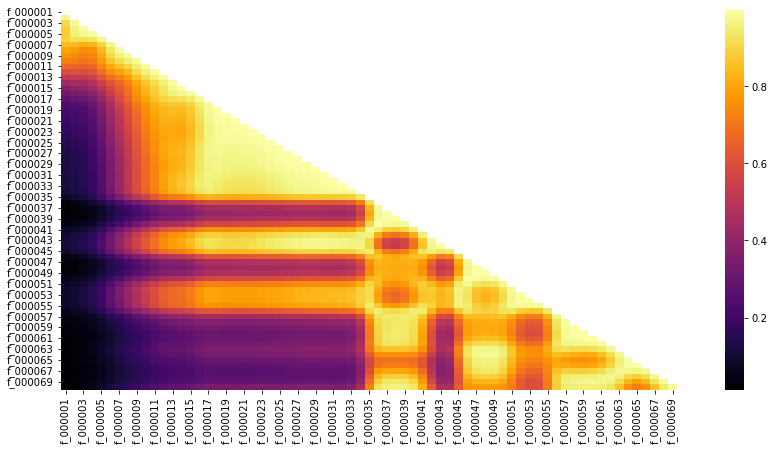

In [12]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(Retinopatia.corr())
sns.heatmap(Retinopatia.corr(), cmap='inferno', annot=False, mask = MatrizInf)
plt.show()

Aquí podemos observar que varias de las frecuencias presentan una fuerte correlación por el criterio de los tercios extremos positivos y negativos, sin embargo, sólo se tomará como referencia para analizar el resultado que se obtenga de la fusión de los datos. 

### **III. Fusion de datos de modo tradicional**

In [13]:
Retinopatia = Retinopatia.drop(columns=['health.status'])
Retinopatia

,f_000001,f_000002,f_000003,f_000004,f_000005,f_000006,f_000007,f_000008,f_000009,f_000010,...,f_000061,f_000062,f_000063,f_000064,f_000065,f_000066,f_000067,f_000068,f_000069,f_000070
0,2150.745881,1812.296506,1797.425232,2000.402651,2096.775161,1901.665846,1542.094413,1235.418132,1055.299286,946.799508,...,3.332748,3.480402,3.854307,5.245511,9.215420,15.686887,20.877630,21.301055,17.878146,13.799770
1,201.462060,227.196312,239.527682,242.712595,233.877109,210.513469,191.437958,202.668934,242.237323,281.191264,...,15.576554,16.825167,18.315843,20.076293,21.848763,23.448133,24.781314,25.852985,26.772444,27.510021
2,57.266926,42.895909,37.259729,34.940005,31.036661,25.152557,19.968624,16.827274,14.809649,12.929315,...,34.657351,34.727477,35.977187,38.361017,41.693322,45.194320,47.899705,49.562395,50.450740,50.533996
3,229.556540,218.015928,229.962008,214.427812,169.474568,117.856876,78.850049,60.246079,60.042319,69.885569,...,18.014346,20.047497,22.536181,25.359234,28.353100,31.507935,34.888351,38.140906,40.915108,43.514155
4,94.251665,96.188890,101.315349,102.756134,99.327028,94.523127,90.872227,87.441905,81.699262,73.520821,...,7.042471,7.696502,8.379038,8.982337,9.471419,9.876325,10.282313,10.735607,11.146974,11.359566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,26.918454,30.309754,32.370351,33.266800,34.510788,36.818745,40.040679,44.653186,50.669628,55.949850,...,3.341653,3.410566,3.541230,3.752837,3.991767,4.186375,4.322308,4.465974,4.699261,5.044514
1108,444.511027,430.493455,419.294383,427.814583,464.004222,503.705996,500.025801,444.127540,382.045806,352.738378,...,14.687543,16.202893,17.692761,19.226280,21.524516,24.649297,26.917099,26.890498,25.170626,23.127421
1109,253.650671,337.009270,426.335102,487.426947,525.123416,560.300413,597.905585,627.652998,635.203600,620.060143,...,2.039017,2.153674,2.299899,2.457559,2.662999,2.969399,3.374929,3.818873,4.224368,4.547494
1110,1322.642976,1282.723175,1302.099324,1320.569524,1337.036977,1379.770024,1396.685578,1325.441130,1181.954549,1027.117330,...,23.274529,24.340751,25.133467,25.785277,26.281525,26.752091,27.452770,28.444717,29.522745,30.401168


#### **1) Media/Promedio**

In [86]:
Fusion = pd.DataFrame()

In [87]:
PromedioSimple = Retinopatia.loc[:, :]
Fusion['Media'] = PromedioSimple.mean(axis='columns')
Fusion

,Media
0,306.643438
1,90.611842
2,16.251806
3,37.748200
4,43.123021
...,...
1107,15.787513
1108,166.457003
1109,159.912036
1110,387.832595


In [88]:
Retinopatia['Media'] = Fusion['Media']
Retinopatia

,f_000001,f_000002,f_000003,f_000004,f_000005,f_000006,f_000007,f_000008,f_000009,f_000010,...,f_000063,f_000064,f_000065,f_000066,f_000067,f_000068,f_000069,f_000070,Media,Mediana
0,2150.745881,1812.296506,1797.425232,2000.402651,2096.775161,1901.665846,1542.094413,1235.418132,1055.299286,946.799508,...,3.854307,5.245511,9.215420,15.686887,20.877630,21.301055,17.878146,13.799770,306.643438,14.326068
1,201.462060,227.196312,239.527682,242.712595,233.877109,210.513469,191.437958,202.668934,242.237323,281.191264,...,18.315843,20.076293,21.848763,23.448133,24.781314,25.852985,26.772444,27.510021,90.611842,32.227710
2,57.266926,42.895909,37.259729,34.940005,31.036661,25.152557,19.968624,16.827274,14.809649,12.929315,...,35.977187,38.361017,41.693322,45.194320,47.899705,49.562395,50.450740,50.533996,16.251806,7.343551
3,229.556540,218.015928,229.962008,214.427812,169.474568,117.856876,78.850049,60.246079,60.042319,69.885569,...,22.536181,25.359234,28.353100,31.507935,34.888351,38.140906,40.915108,43.514155,37.748200,18.585033
4,94.251665,96.188890,101.315349,102.756134,99.327028,94.523127,90.872227,87.441905,81.699262,73.520821,...,8.379038,8.982337,9.471419,9.876325,10.282313,10.735607,11.146974,11.359566,43.123021,42.899036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,26.918454,30.309754,32.370351,33.266800,34.510788,36.818745,40.040679,44.653186,50.669628,55.949850,...,3.541230,3.752837,3.991767,4.186375,4.322308,4.465974,4.699261,5.044514,15.787513,4.688833
1108,444.511027,430.493455,419.294383,427.814583,464.004222,503.705996,500.025801,444.127540,382.045806,352.738378,...,17.692761,19.226280,21.524516,24.649297,26.917099,26.890498,25.170626,23.127421,166.457003,51.353510
1109,253.650671,337.009270,426.335102,487.426947,525.123416,560.300413,597.905585,627.652998,635.203600,620.060143,...,2.299899,2.457559,2.662999,2.969399,3.374929,3.818873,4.224368,4.547494,159.912036,24.169915
1110,1322.642976,1282.723175,1302.099324,1320.569524,1337.036977,1379.770024,1396.685578,1325.441130,1181.954549,1027.117330,...,25.133467,25.785277,26.281525,26.752091,27.452770,28.444717,29.522745,30.401168,387.832595,67.589846


#### **2) Mediana**

In [89]:
Mediana = Retinopatia.loc[: , 'f_000001':'f_000070']
Fusion['Mediana'] = Mediana.median(axis='columns')
Fusion

,Media,Mediana
0,306.643438,14.326068
1,90.611842,32.227710
2,16.251806,7.343551
3,37.748200,18.585033
4,43.123021,42.899036
...,...,...
1107,15.787513,4.688833
1108,166.457003,51.353510
1109,159.912036,24.169915
1110,387.832595,67.589846


In [90]:
Retinopatia['Mediana'] = Fusion['Mediana']
Retinopatia

,f_000001,f_000002,f_000003,f_000004,f_000005,f_000006,f_000007,f_000008,f_000009,f_000010,...,f_000063,f_000064,f_000065,f_000066,f_000067,f_000068,f_000069,f_000070,Media,Mediana
0,2150.745881,1812.296506,1797.425232,2000.402651,2096.775161,1901.665846,1542.094413,1235.418132,1055.299286,946.799508,...,3.854307,5.245511,9.215420,15.686887,20.877630,21.301055,17.878146,13.799770,306.643438,14.326068
1,201.462060,227.196312,239.527682,242.712595,233.877109,210.513469,191.437958,202.668934,242.237323,281.191264,...,18.315843,20.076293,21.848763,23.448133,24.781314,25.852985,26.772444,27.510021,90.611842,32.227710
2,57.266926,42.895909,37.259729,34.940005,31.036661,25.152557,19.968624,16.827274,14.809649,12.929315,...,35.977187,38.361017,41.693322,45.194320,47.899705,49.562395,50.450740,50.533996,16.251806,7.343551
3,229.556540,218.015928,229.962008,214.427812,169.474568,117.856876,78.850049,60.246079,60.042319,69.885569,...,22.536181,25.359234,28.353100,31.507935,34.888351,38.140906,40.915108,43.514155,37.748200,18.585033
4,94.251665,96.188890,101.315349,102.756134,99.327028,94.523127,90.872227,87.441905,81.699262,73.520821,...,8.379038,8.982337,9.471419,9.876325,10.282313,10.735607,11.146974,11.359566,43.123021,42.899036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,26.918454,30.309754,32.370351,33.266800,34.510788,36.818745,40.040679,44.653186,50.669628,55.949850,...,3.541230,3.752837,3.991767,4.186375,4.322308,4.465974,4.699261,5.044514,15.787513,4.688833
1108,444.511027,430.493455,419.294383,427.814583,464.004222,503.705996,500.025801,444.127540,382.045806,352.738378,...,17.692761,19.226280,21.524516,24.649297,26.917099,26.890498,25.170626,23.127421,166.457003,51.353510
1109,253.650671,337.009270,426.335102,487.426947,525.123416,560.300413,597.905585,627.652998,635.203600,620.060143,...,2.299899,2.457559,2.662999,2.969399,3.374929,3.818873,4.224368,4.547494,159.912036,24.169915
1110,1322.642976,1282.723175,1302.099324,1320.569524,1337.036977,1379.770024,1396.685578,1325.441130,1181.954549,1027.117330,...,25.133467,25.785277,26.281525,26.752091,27.452770,28.444717,29.522745,30.401168,387.832595,67.589846


In [91]:
columnas = Retinopatia.columns

In [92]:
columnas2 = columnas[:-2]
columnas2

Index(['f_000001', 'f_000002', 'f_000003', 'f_000004', 'f_000005', 'f_000006',
       'f_000007', 'f_000008', 'f_000009', 'f_000010', 'f_000011', 'f_000012',
       'f_000013', 'f_000014', 'f_000015', 'f_000016', 'f_000017', 'f_000018',
       'f_000019', 'f_000020', 'f_000021', 'f_000022', 'f_000023', 'f_000024',
       'f_000025', 'f_000026', 'f_000027', 'f_000028', 'f_000029', 'f_000030',
       'f_000031', 'f_000032', 'f_000033', 'f_000034', 'f_000035', 'f_000036',
       'f_000037', 'f_000038', 'f_000039', 'f_000040', 'f_000041', 'f_000042',
       'f_000043', 'f_000044', 'f_000045', 'f_000046', 'f_000047', 'f_000048',
       'f_000049', 'f_000050', 'f_000051', 'f_000052', 'f_000053', 'f_000054',
       'f_000055', 'f_000056', 'f_000057', 'f_000058', 'f_000059', 'f_000060',
       'f_000061', 'f_000062', 'f_000063', 'f_000064', 'f_000065', 'f_000066',
       'f_000067', 'f_000068', 'f_000069', 'f_000070'],
      dtype='object')

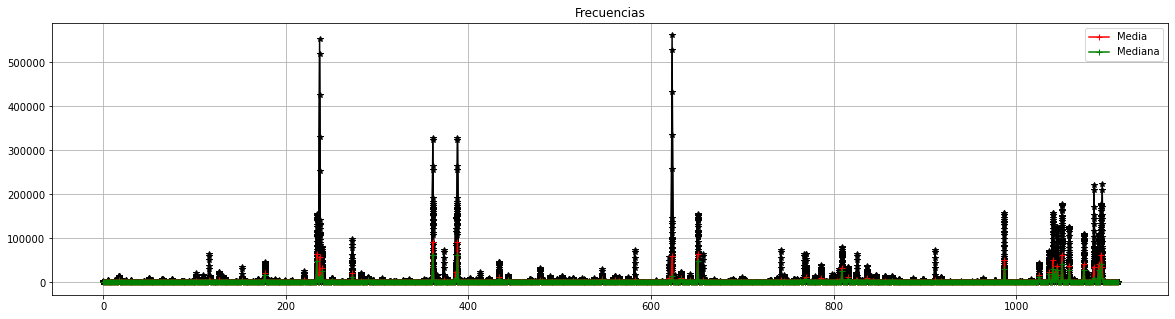

In [93]:
plt.figure(figsize=(20, 5))
for columnas in columnas2:
    plt.plot(Retinopatia[columnas], color='black', marker='*')
plt.plot(Fusion['Media'], color='red', marker='+', label='Media')
plt.plot(Fusion['Mediana'], color='green', marker='+', label='Mediana')
plt.title('Frecuencias')
plt.grid(True)
plt.legend()
plt.show()

### **IV. Fusion de datos mediante algoritmos de ML**

In [95]:
inicio = [0,5,10,15,20,25,30,35,40,45,50,55,60,65]
final = [4,9,14,19,24,29,34,39,44,49,54,59,64,69]
nombre = ["f1'","f2'","f3'","f4'","f5'","f6'","f7'","f8'","f9'","f10'","f11'","f12'","f13'","f14'"]

for elemento, elemento2, elemento3 in zip(inicio, final, nombre):
    X_train = np.array(Retinopatia[columnas2[elemento:elemento2]])
    Y_train = np.array(Retinopatia[columnas2[elemento2]])
    FusionLineal = linear_model.LinearRegression()
    FusionLineal.fit(X_train, Y_train)
    Y_estimacion = FusionLineal.predict(X_train)        
    Fusion[elemento3] = Y_estimacion
    print("----------------------------------------------------------")
    print('Coeficientes: \n', FusionLineal.coef_)
    print('Intercepto: \n', FusionLineal.intercept_)
    print("MSE: %.4f" % mean_squared_error(Y_train, Y_estimacion))
    print("RMSE: %.4f" % mean_squared_error(Y_train, Y_estimacion, squared=False))  #True devuelve MSE, False devuelve RMSE
    print('Score (Bondad de ajuste): %.4f' % r2_score(Y_train, Y_estimacion))

----------------------------------------------------------
Coeficientes: 
 [-0.59246922  2.26339056 -3.60909381  2.94129534]
Intercepto: 
 -4.1922021330472035
MSE: 55316.4120
RMSE: 235.1944
Score (Bondad de ajuste): 0.9983
----------------------------------------------------------
Coeficientes: 
 [-0.49899702  1.94579659 -3.2523126   2.80022536]
Intercepto: 
 3.3980080405185618
MSE: 27808.8167
RMSE: 166.7598
Score (Bondad de ajuste): 0.9988
----------------------------------------------------------
Coeficientes: 
 [-1.21858498  4.00592454 -5.25910565  3.49405862]
Intercepto: 
 -8.342233578692458
MSE: 71260.9565
RMSE: 266.9475
Score (Bondad de ajuste): 0.9986
----------------------------------------------------------
Coeficientes: 
 [-1.00159961  2.99219831 -4.01225208  3.01746482]
Intercepto: 
 7.812469104092997
MSE: 22846.9161
RMSE: 151.1520
Score (Bondad de ajuste): 0.9998
----------------------------------------------------------
Coeficientes: 
 [-0.43562521  1.79140366 -3.16853732 

In [96]:
Fusion

,Media,Mediana,f1',f2',f3',f4',f5',f6',f7',f8',f9',f10',f11',f12',f13',f14'
0,306.643438,14.326068,2220.190601,992.184337,423.156757,159.194055,54.985607,27.316657,17.348062,7.783226,7.817856,2.549595,9.186807,2.685291,11.832886,15.589610
1,90.611842,32.227710,240.093269,290.028108,211.533018,144.881790,137.186258,79.809198,39.485442,14.702491,9.227468,4.340462,15.263608,13.724085,25.840785,30.069699
2,16.251806,7.343551,27.264120,16.444638,-0.336623,12.306226,1.841661,13.387960,13.236769,0.974927,8.068088,6.899847,36.080940,34.767850,44.744296,53.409127
3,37.748200,18.585033,153.998872,70.206878,39.343579,29.374014,19.668414,20.476299,16.865444,5.827796,10.906976,8.524561,20.594786,15.853989,31.795483,45.542546
4,43.123021,42.899036,94.259153,77.438055,67.801774,82.142007,66.839160,61.973483,56.060837,30.627664,18.099128,8.143556,13.430801,5.978732,13.836513,13.975413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,15.787513,4.688833,29.482106,59.596838,28.758277,43.314745,15.084254,18.332192,15.433332,1.419850,7.100359,3.253313,9.378316,2.738733,8.579568,7.521713
1108,166.457003,51.353510,451.879799,350.371475,340.253784,404.865041,308.461858,159.165602,61.510897,12.281307,10.055488,5.301848,16.716422,12.736521,24.703647,25.423964
1109,159.912036,24.169915,503.294415,624.601896,440.912833,304.576837,157.793107,65.497104,32.005066,12.484521,12.214417,3.892399,9.145288,1.464937,7.211208,7.072623
1110,387.832595,67.589846,1300.272459,1031.553127,1038.113590,638.666469,409.882925,209.384039,68.742977,39.132392,31.265014,15.146043,19.464195,20.939631,30.358287,32.942871


In [97]:
columnasF = Fusion.columns
columnasF = columnasF[2:]
columnasF

Index(['f1'', 'f2'', 'f3'', 'f4'', 'f5'', 'f6'', 'f7'', 'f8'', 'f9'', 'f10'',
       'f11'', 'f12'', 'f13'', 'f14''],
      dtype='object')

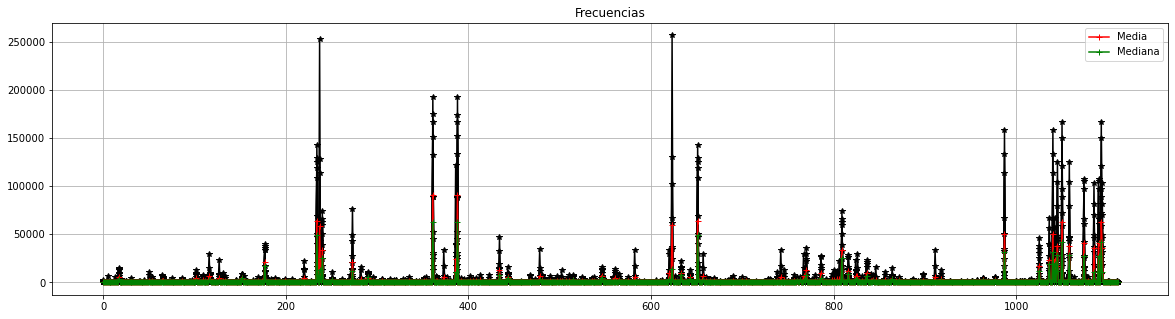

In [98]:
plt.figure(figsize=(20, 5))
for columnas in columnasF:
    plt.plot(Fusion[columnas], color='black', marker='*')
plt.plot(Fusion['Media'], color='red', marker='+', label='Media')
plt.plot(Fusion['Mediana'], color='green', marker='+', label='Mediana')
plt.title('Frecuencias')
plt.grid(True)
plt.legend()
plt.show()

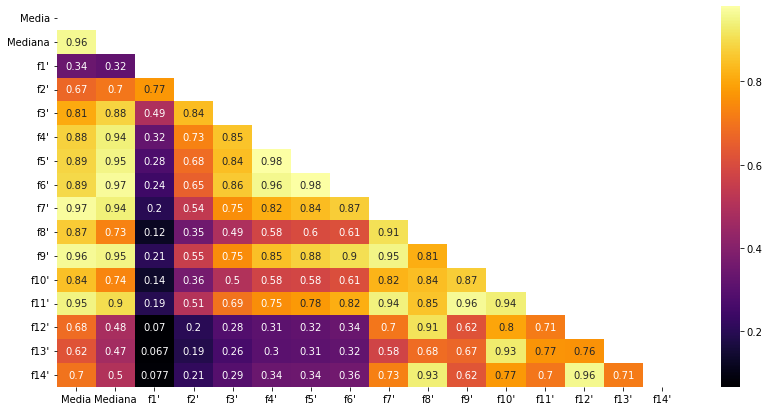

In [100]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(Fusion.corr())
sns.heatmap(Fusion.corr(), cmap='inferno', annot=True, mask = MatrizInf)
plt.show()

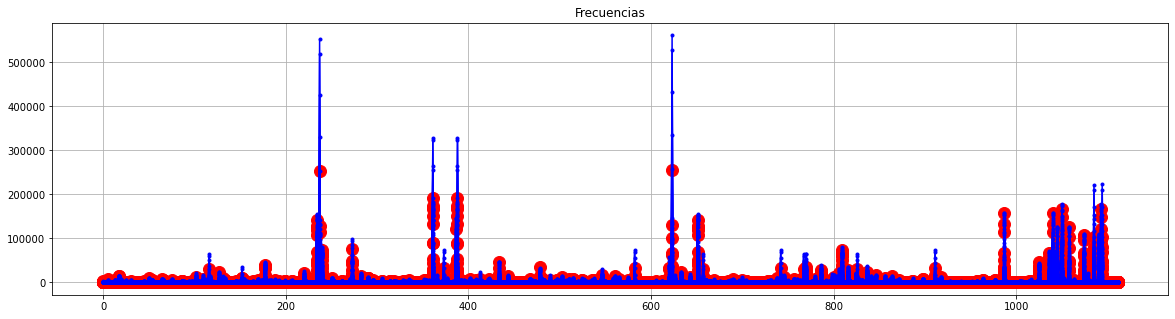

In [111]:
plt.figure(figsize=(20, 5))
for columnas in columnasF:
    plt.plot(Fusion[columnas], color='red', marker='o', markersize=12) #Frecuencias primas
for columnas in columnas2:
    plt.plot(Retinopatia[columnas], color='blue', marker='.') #Frecuencias originales
plt.title('Frecuencias')
plt.grid(True)
plt.show()